# PV Diagram Keplerian Profiling $NH_3$(6,3) W51d2

Text(1, 1, 'NH3')

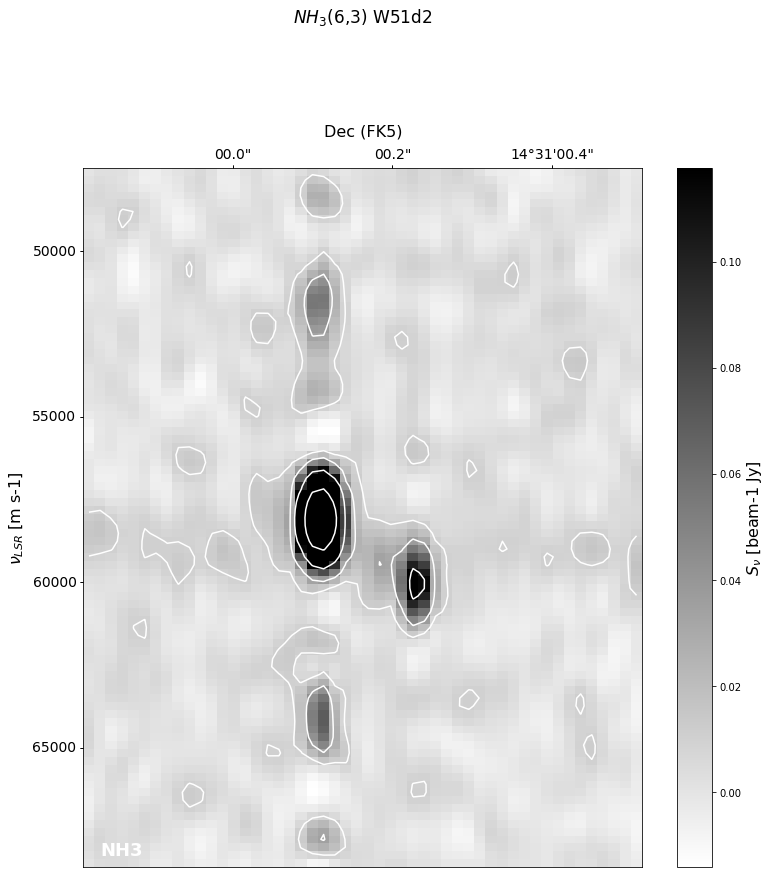

In [300]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_56_corrected2.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(595., 368.), (681., 344.5)])

pv = extract_pv_slice(fh, path1,wcs=ww)

fig = pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww, slices =(5, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='gray_r', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=99), aspect = 'auto')

cs = ax.contour(pv.data.transpose(), levels=np.logspace(-2, 0.10, 5), colors='white', alpha=1)
#ax.clabel(cs, inline=False, fontsize=11)

cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
# vrad.set_ticks([np.nanmin(fh[0].data), 63500]*u.m/u.s, ["t","t"])
# ax.set_yticklabels(["t","t"])
pl.tight_layout()
ax.set_title('$NH_3$(6,3) W51d2', y=1.2, fontsize=17)
ax.text(s='NH3', y=1, x=1, color='white', fontsize=18, weight='bold')

In [382]:
def keplerian_profile (offset):
    G = 6.67E-11 # N*m^2/kg^2
    M = 1.989E12 # mass of the sun in kg
    y_top = -(np.sqrt(G*M/offset))
    y_bot = (np.sqrt(G*M/np.negative(offset)))
    
    return np.piecewise(offset, [offset > 0, offset < 0],
                    [lambda offset: y_top, lambda offset: y_bot])

In [305]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    pvww = WCS(pv.header)

In [306]:
pvww

WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VRAD'  
CRVAL : 0.0  68483.403651419  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 3.888888888889e-06  -237.07117416458  
NAXIS : 89  50

In [304]:
keplerian_profile()

/scratch/local/37293767/ipykernel_27860/1883553370.py:2: RuntimeWarning: invalid value encountered in sqrt
  y_top = -(1/np.sqrt(offset))
/scratch/local/37293767/ipykernel_27860/1883553370.py:3: RuntimeWarning: invalid value encountered in sqrt
  y_bot = (1/np.sqrt(np.negative(offset)))


TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

/scratch/local/37293767/ipykernel_27860/1562311991.py:5: RuntimeWarning: invalid value encountered in sqrt
  y_bot = (np.sqrt(G*M/np.negative(offset)))
/scratch/local/37293767/ipykernel_27860/1562311991.py:4: RuntimeWarning: invalid value encountered in sqrt
  y_top = -(np.sqrt(G*M/offset))


Text(0.5, 1.02, '$NH_3$(6,3) W51d2')

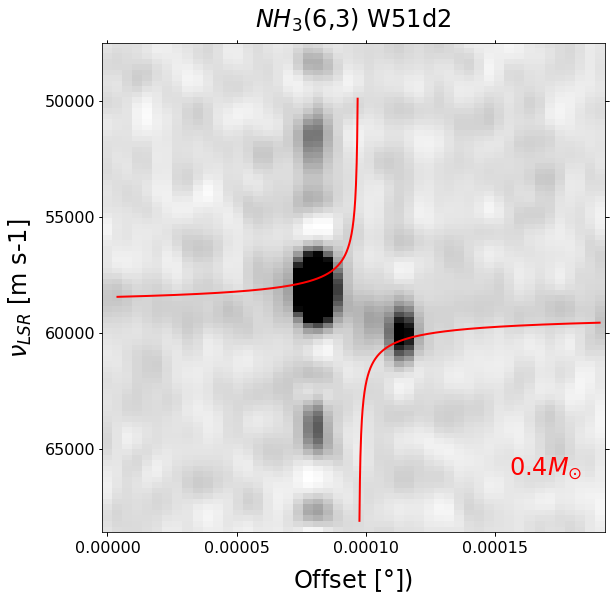

In [442]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=pvww)
x = np.linspace(0.09,24,1000)
im = ax.imshow(pv.data.transpose(), cmap='gray_r', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=99), aspect = 'auto')
ax.plot(x+25, keplerian_profile(x)+40, transform=ax.get_transform(pvww), linewidth=2, color = "red")
ax.plot(-x+25, keplerian_profile(-x)+40, transform=ax.get_transform(pvww), linewidth=2, color = "red")


plt.text(40, 10, '$0.4M_{\odot}$',
         color='red', rotation=0,
         transform=ax.get_transform(pvww), fontsize=24)

_ = ax.set_xlabel("Offset [$\\degree $])", fontsize = 24)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 24)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.set_title('$NH_3$(6,3) W51d2', y=1.02, fontsize=24)

In [119]:
np.piecewise(x, [x < 0, x >= 0], [lambda x: -x, lambda x: x])

array([10.])

In [104]:
y = -900
np.piecewise(y, [y < 0, y >= 0], [lambda x: -x, lambda x: x])

array(900)